## steps in building regression model
#### 1) build teh model taking all the features.
#### 2) check for the R^2 value (industry standard >=80%)
#### 3) check for the adjusted R^2 value :should be near to R^2 , it tells about the impact of junk features on R^2
#### 4) check for the impactfull of the variable by checking p-value of the coefficients : should be very small       (p<0.05),if the variable p value is < .05 keep the variable otherwise drop the variable
#### 5) check for multicollinearity : if the value of VIF is less than 5 it means there is no multicollinearity. and its independant variable , if vif >5 it means there is multicollinearity, drop the variable one by one by recalculating the vif after dropiing one of them.
VIF (variance inflation factor ) used to determine the multicollinearity = 1/(1-R^2)
##### There is no order for step 4 and step 5

In [11]:
import pandas as pd
import numpy as np
import matplotlib as matlab
import statsmodels
import seaborn as sns

# Correlation

In [3]:
air = pd.read_csv("data/AirPassengers.csv")
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Week_num                      80 non-null     int64  
 1   Passengers                    80 non-null     int64  
 2   Promotion_Budget              80 non-null     int64  
 3   Service_Quality_Score         80 non-null     float64
 4   Holiday_week                  80 non-null     object 
 5   Delayed_Cancelled_flight_ind  80 non-null     object 
 6   Inter_metro_flight_ratio      80 non-null     float64
 7   Bad_Weather_Ind               80 non-null     object 
 8   Technical_issues_ind          80 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.8+ KB


In [4]:
air.head(5)

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


In [8]:
air.columns.values

array(['Week_num', 'Passengers', 'Promotion_Budget',
       'Service_Quality_Score', 'Holiday_week',
       'Delayed_Cancelled_flight_ind', 'Inter_metro_flight_ratio',
       'Bad_Weather_Ind', 'Technical_issues_ind'], dtype=object)

In [9]:
air.describe()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
count,80.0000,80.000000,8.000000e+01,80.000000,80.000000
mean,40.5000,44745.025000,6.254223e+05,2.781168,0.693000
std,23.2379,11267.155215,1.565143e+05,1.000204,0.158045
min,1.0000,28700.000000,3.656800e+05,0.855360,0.380000
25%,20.7500,36424.000000,5.178915e+05,1.931580,0.610000
50%,40.5000,43144.000000,5.979190e+05,3.108120,0.720000
75%,60.2500,48864.000000,6.885935e+05,3.608882,0.802500
max,80.0000,81228.000000,1.108254e+06,4.000000,0.900000


In [6]:
air.isnull().value_counts()


Week_num  Passengers  Promotion_Budget  Service_Quality_Score  Holiday_week  Delayed_Cancelled_flight_ind  Inter_metro_flight_ratio  Bad_Weather_Ind  Technical_issues_ind
False     False       False             False                  False         False                         False                     False            False                   80
Name: count, dtype: int64

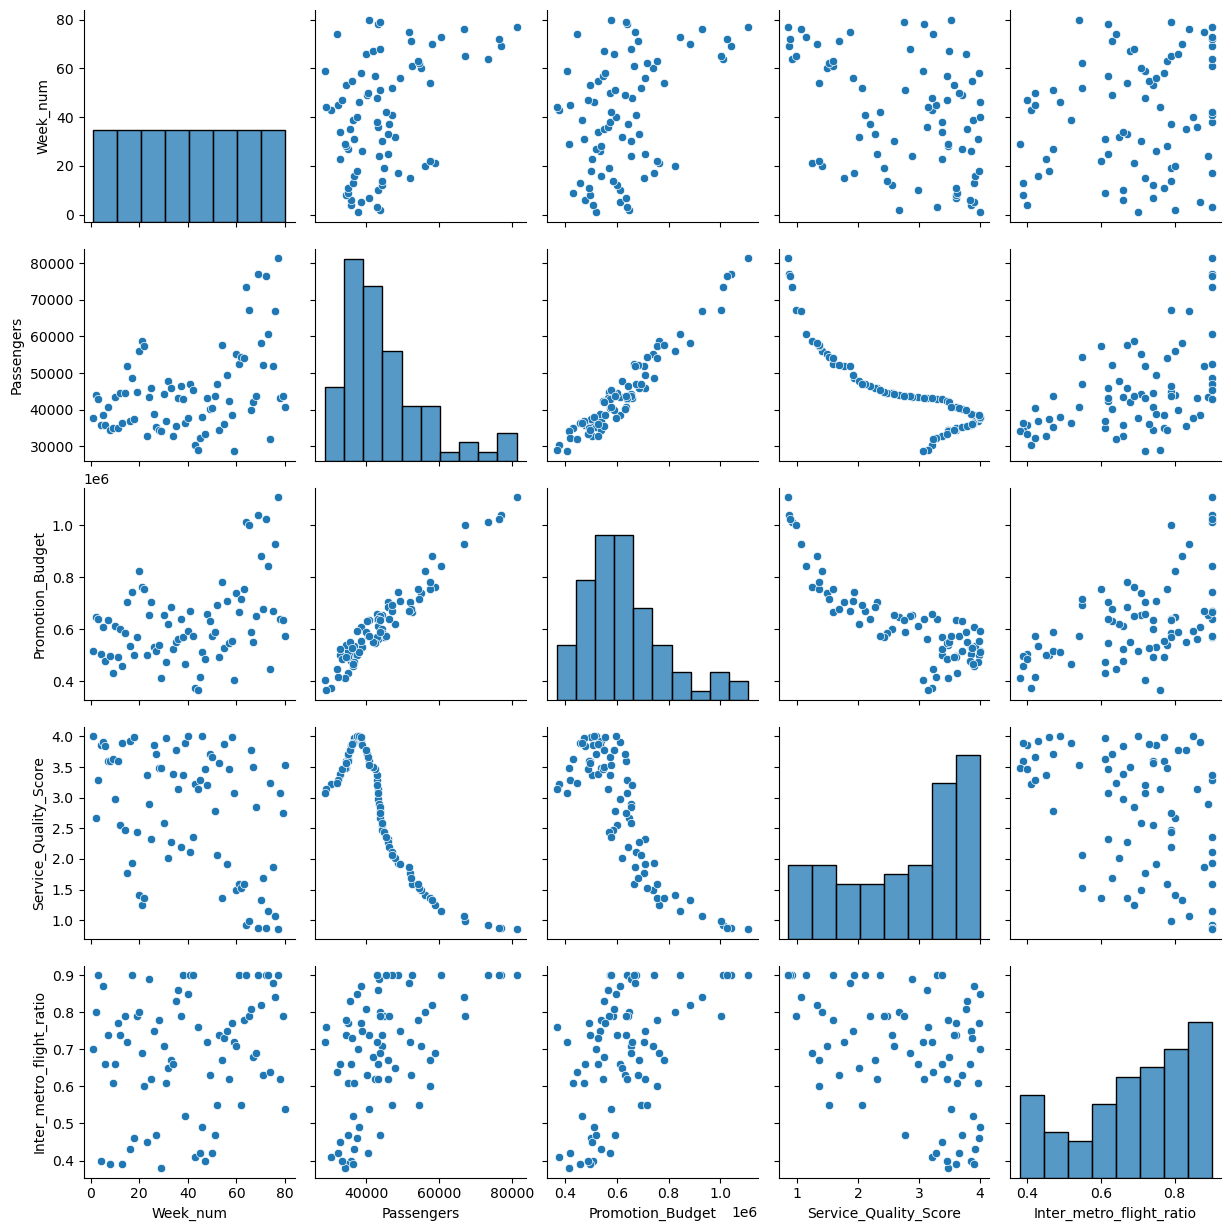

In [13]:
sns.pairplot(air)

<Axes: >

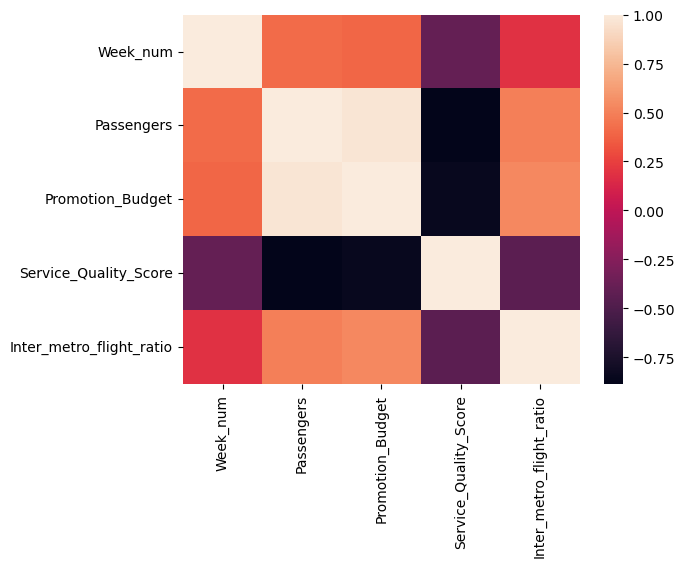

In [25]:

sns.heatmap(air.corr(numeric_only=True,))

In [10]:
#Find the correlation between number of passengers and promotional budget.
np.corrcoef(air.Passengers,air.Promotion_Budget)

array([[1.        , 0.96585103],
       [0.96585103, 1.        ]])

# Regression

OLS(ordinary least squares solution), below two models are there with different independent variables , now to find the best model out of the   two models  we will use the R^2 value calculated for each model. if the value is near to one thats a good model. better industry practice is > 80% model validation

In [26]:
import statsmodels.formula.api as sm
model = sm.ols(formula='Passengers ~ Promotion_Budget', data=air)
fitted1 = model.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1084.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.66e-47
Time:                        17:57:08   Log-Likelihood:                -751.34
No. Observations:                  80   AIC:                             1507.
Df Residuals:                      78   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1259.6058   1361.071  

In [ ]:
#b0 ==> Intercept  ==>
#b1 ===> coeff prmo budget ==>

In [28]:
# y = b0 +b1*x
# Passengers = 1259.6058 + 0.0695 * (promo_budget)
# promo_budget = 500,000 ==> Predict passengers ?

1259.6058 + 0.0695 * (500000)

36009.6058

# R Squared 
#### Residual square 

Y actual 
Y predicted

SSE= sum[(Y predicted - Y actual)^2] , a good model shold be SSE near to zero 

sum of square of regression prediction ,  SSR = sum([Y predicted]^2)

sum of square of actual toata , SST = sum([Y actual]^2)


SST= SSR + SSE 


SSR/SST , should be near to one . this is only none as R^2 

and in real world it should be greater than 80 percent.

### R^2 = SSR/SST





In [29]:
##Regression Model inter_metro_flight_ratio and passengers count
#matlab.pyplot.scatter(air.Inter_metro_flight_ratio,air.Passengers)

import statsmodels.formula.api as sm
model = sm.ols(formula='Passengers ~ Inter_metro_flight_ratio', data=air)
fitted2 = model.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     24.90
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           3.58e-06
Time:                        18:39:26   Log-Likelihood:                -848.30
No. Observations:                  80   AIC:                             1701.
Df Residuals:                      78   BIC:                             1705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# Multiple Regerssion Model

In [31]:
model = sm.ols(formula='Passengers ~ Promotion_Budget+Service_Quality_Score+Inter_metro_flight_ratio', data=air)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     495.6
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           8.71e-50
Time:                        19:57:12   Log-Likelihood:                -738.45
No. Observations:                  80   AIC:                             1485.
Df Residuals:                      76   BIC:                             1494.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

# Individual variables impact

the variable impact on the model is identified with p value , p<0.05 is impactfull and keep the variable for the model creation, if p >= 0.05 then the variable has no impact on the model outcome so drop the variable. so in the above outcome Inter_metro_flight_ratio variable can be dropped as it has a higher p value more then 0.05

In [32]:
#Are there any predictor variables that are not impacting the dependent variable
##Inter_metro_flight_ratio is dropped
import statsmodels.formula.api as sm
model = sm.ols(formula='Passengers ~ Promotion_Budget+Service_Quality_Score', data=air)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     744.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           4.38e-51
Time:                        19:57:41   Log-Likelihood:                -738.91
No. Observations:                  80   AIC:                             1484.
Df Residuals:                      77   BIC:                             1491.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.853e+

In [33]:
import statsmodels.formula.api as sm
model = sm.ols(formula='Passengers ~ Service_Quality_Score', data=air)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     286.4
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           7.88e-28
Time:                        19:57:45   Log-Likelihood:                -797.72
No. Observations:                  80   AIC:                             1599.
Df Residuals:                      78   BIC:                             1604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7.252e+

# Adjusted R-Square

in most cases the R-Square and the adjusted R-Square are the same , but sometimes if you see there are significant differences  between them then you can assume that there are certain junk features which is non imactful to the model output 
beacuse some times too many features can fool the r square value so look for the differences between r square and the adjusted R-Square

In [34]:
adj_sample=pd.read_csv("data/Adj_Sample.csv")
#Build a model to predict y using x1,x2 and x3. Note down R-Square and Adj R-Square values
model = sm.ols(formula='Y ~ x1+x2+x3', data=adj_sample)
fitted = model.fit()
print(fitted.summary())
#R-Squared

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     5.785
Date:                Tue, 15 Oct 2024   Prob (F-statistic):             0.0211
Time:                        20:15:47   Log-Likelihood:                -10.430
No. Observations:                  12   AIC:                             28.86
Df Residuals:                       8   BIC:                             30.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8798      1.163     -2.477      0.0

c:\Users\WIN-10\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [35]:
#Model2
model = sm.ols(formula='Y ~ x1+x2+x3+x4+x5+x6', data=adj_sample)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     2.111
Date:                Tue, 15 Oct 2024   Prob (F-statistic):              0.215
Time:                        20:15:56   Log-Likelihood:                -9.7790
No. Observations:                  12   AIC:                             33.56
Df Residuals:                       5   BIC:                             36.95
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3751      4.687     -1.147      0.3

c:\Users\WIN-10\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [36]:
#Model3
model = sm.ols(formula='Y ~ x1+x2+x3+x4+x5+x6+x7+x8', data=adj_sample)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     1.549
Date:                Tue, 15 Oct 2024   Prob (F-statistic):              0.393
Time:                        20:16:00   Log-Likelihood:                -7.5390
No. Observations:                  12   AIC:                             33.08
Df Residuals:                       3   BIC:                             37.44
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0440     19.903      0.856      0.4

c:\Users\WIN-10\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


# Multiple Regression- issues

In [37]:
#Import Regional Sales data
regional_sales=pd.read_csv("data/Sales_by_Region.csv")

#Variable names
regional_sales.columns

Index(['Region_id', 'Avg_Income', 'Avg_Expenses', 'Percent_Male',
       'Percent_Female', 'Regional_Sales'],
      dtype='object')

In [39]:
model1 = sm.ols(formula='Regional_Sales ~ Avg_Income+Avg_Expenses+Percent_Male+Percent_Female', data=regional_sales)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:         Regional_Sales   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     124.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           5.71e-36
Time:                        20:44:14   Log-Likelihood:                -955.00
No. Observations:                  96   AIC:                             1920.
Df Residuals:                      91   BIC:                             1933.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.318e+04   1.95e+04     -2.

Model After dropping Avg Income

Multicolinear issues raised by 2 or more variables are considered to be linearly related.
Multicolinearity means inter dependent variables

In [40]:
model1 = sm.ols(formula='Regional_Sales ~ Avg_Expenses+Percent_Male+Percent_Female', data=regional_sales)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:         Regional_Sales   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     158.3
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           3.35e-36
Time:                        20:44:30   Log-Likelihood:                -957.21
No. Observations:                  96   AIC:                             1922.
Df Residuals:                      92   BIC:                             1933.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.879e+04   1.98e+04     -1.

### VIF (variance inflation factor ) used to determine the multicollinearity = 1/(1-R^2)
if VIF  >= 5 , then the variable is involved in multicollinearity . multcollinearity is calculated using the  following like take all the features , and predict one against other features and take the R^2 value and for each feature calculate the R^2 value and calclute VIF using  1/(1-R^2) , the variable which is having VIF value >5 , that variable is involved in multicollinearity and  check for all the variables and drop the feature or variable one by one by recalculating the vif by dropping one by one, just drop the most redudant variables means which is having the highest VIF

In [50]:
#Code for VIF Calculation
#Writing a function to calculate the VIF values

def vif_cal(input_data):
    x_vars = input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [51]:
#Calculating VIF values using that function
X_Data=regional_sales.drop(["Region_id","Regional_Sales"],axis=1)
vif_cal(input_data=X_Data)

Avg_Income  VIF =  863.43
Avg_Expenses  VIF =  862.07
Percent_Male  VIF =  11.31
Percent_Female  VIF =  11.48


In [52]:
vif_cal(input_data=X_Data.drop(["Avg_Income"], axis=1))

Avg_Expenses  VIF =  1.07
Percent_Male  VIF =  11.29
Percent_Female  VIF =  11.41


In [53]:
vif_cal(input_data=X_Data.drop(["Avg_Income","Percent_Female"], axis=1))

Avg_Expenses  VIF =  1.0
Percent_Male  VIF =  1.0


In [54]:
model1 = sm.ols(formula='Regional_Sales ~ Avg_Expenses+Percent_Male', data=regional_sales)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:         Regional_Sales   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     226.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.95e-36
Time:                        21:42:51   Log-Likelihood:                -959.61
No. Observations:                  96   AIC:                             1925.
Df Residuals:                      93   BIC:                             1933.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2758.7784   5011.638      0.550   

# Multiple Regression model building steps

In [46]:
Webpage_Product_Sales=pd.read_csv("data/Webpage_Product_Sales.csv")
Webpage_Product_Sales.shape
Webpage_Product_Sales.columns

Index(['ID', 'DayofMonth', 'Weekday', 'Month', 'Social_Network_Ref_links',
       'Online_Ad_Paid_ref_links', 'Clicks_From_Serach_Engine',
       'Special_Discount', 'Holiday', 'Server_Down_time_Sec', 'Web_UI_Score',
       'Sales'],
      dtype='object')

In [47]:
model1 = sm.ols(formula='Sales ~ Web_UI_Score+Server_Down_time_Sec+Holiday+Special_Discount+Clicks_From_Serach_Engine+Online_Ad_Paid_ref_links+Social_Network_Ref_links+Month+Weekday+DayofMonth', data=Webpage_Product_Sales)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     298.4
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          5.54e-238
Time:                        21:39:41   Log-Likelihood:                -6456.7
No. Observations:                 675   AIC:                         1.294e+04
Df Residuals:                     664   BIC:                         1.299e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [48]:
model1 = sm.ols(formula='Sales ~ Web_UI_Score+Server_Down_time_Sec+Holiday+Special_Discount+Online_Ad_Paid_ref_links+Social_Network_Ref_links+Month+Weekday+DayofMonth', data=Webpage_Product_Sales)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     332.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          2.98e-239
Time:                        21:40:08   Log-Likelihood:                -6456.7
No. Observations:                 675   AIC:                         1.293e+04
Df Residuals:                     665   BIC:                         1.298e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [55]:
#VIF
vif_cal(Webpage_Product_Sales.drop("Clicks_From_Serach_Engine", axis=1))

ID  VIF =  1.58
DayofMonth  VIF =  1.02
Weekday  VIF =  1.83
Month  VIF =  1.27
Social_Network_Ref_links  VIF =  1.5
Online_Ad_Paid_ref_links  VIF =  1.89
Special_Discount  VIF =  1.73
Holiday  VIF =  3.44
Server_Down_time_Sec  VIF =  1.2
Web_UI_Score  VIF =  1.02
Sales  VIF =  7.38


In [56]:
model1 = sm.ols(formula='Sales ~ Web_UI_Score+Server_Down_time_Sec+Holiday+Special_Discount+Online_Ad_Paid_ref_links+Social_Network_Ref_links+Month+Weekday+DayofMonth', data=Webpage_Product_Sales)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     332.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          2.98e-239
Time:                        21:44:11   Log-Likelihood:                -6456.7
No. Observations:                 675   AIC:                         1.293e+04
Df Residuals:                     665   BIC:                         1.298e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               